In [33]:
# Importing and Agnostic Code
import torch
from torch import nn
torch.__version__
device="cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [34]:
from os import RWF_APPEND
# Getting Data from zip file
import requests
import zipfile
from pathlib import Path
data_path=Path("data/")
image_path =data_path/ "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists...")

else:
  print(f"{image_path} directory does not exist")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path/"pizza_steak_sushi.zip","wb") as f :
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi directory exists...
Unzipping pizza, steak, sushi data...


In [35]:
# Converting Data in correct format
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There is {len(dirnames)} directoies and {len(filenames)} images in {dirpath}")


In [36]:
walk_through_dir(image_path)

There is 2 directoies and 0 images in data/pizza_steak_sushi
There is 3 directoies and 0 images in data/pizza_steak_sushi/test
There is 0 directoies and 19 images in data/pizza_steak_sushi/test/steak
There is 0 directoies and 31 images in data/pizza_steak_sushi/test/sushi
There is 0 directoies and 25 images in data/pizza_steak_sushi/test/pizza
There is 3 directoies and 0 images in data/pizza_steak_sushi/train
There is 0 directoies and 75 images in data/pizza_steak_sushi/train/steak
There is 0 directoies and 72 images in data/pizza_steak_sushi/train/sushi
There is 0 directoies and 78 images in data/pizza_steak_sushi/train/pizza


In [37]:
#Setup Train/Test Paths
train_dir=image_path/"train"
test_dir=image_path/"test"
train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/pizza/2871261.jpg
pizza
Random Image Pathdata/pizza_steak_sushi/test/pizza/2871261.jpg
Image Class:pizza
Image Size:(512, 384)


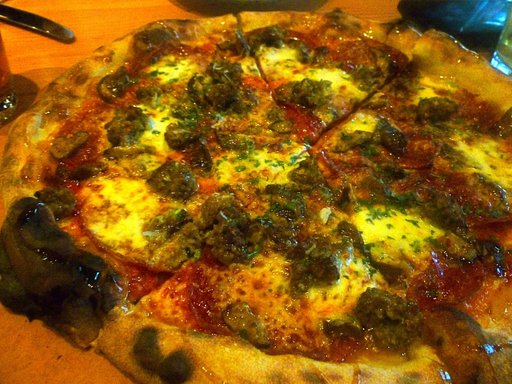

In [38]:
# Visualizing Image using Code  (Pythons -> PIL Library )
import random
from PIL import Image
random.seed(42)
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list
random_image_path=random.choice(image_path_list)
print(random_image_path)

image_class=random_image_path.parent.stem
print(image_class)

image=Image.open(random_image_path)

print(f"Random Image Path{random_image_path}")
print(f"Image Class:{image_class}")
print(f"Image Size:{image.size}")
image

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

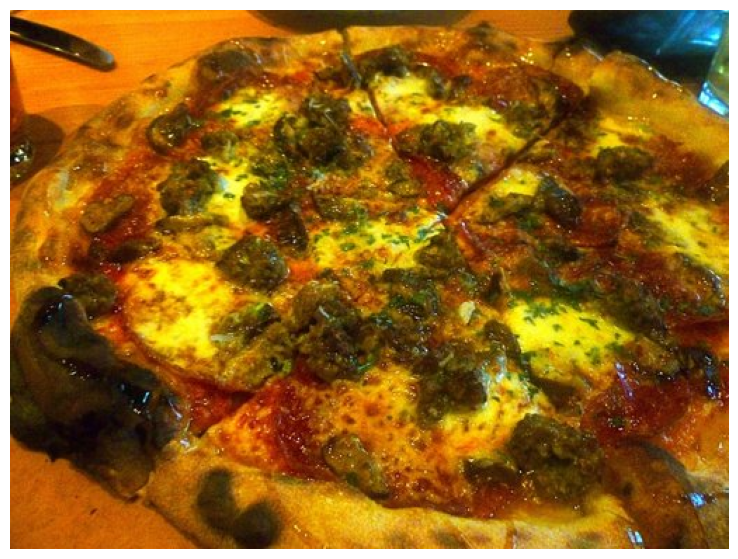

In [39]:
#Visualize using matplotlib
import matplotlib.pyplot as plt
import numpy as np
img_as_array=np.asarray(image)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis(False)


array([[[214, 150,  63],
        [189, 123,  39],
        [162,  90,  14],
        ...,
        [162, 255, 255],
        [156, 254, 255],
        [123, 220, 226]],

       [[164,  98,  14],
        [154,  86,   3],
        [140,  67,   0],
        ...,
        [ 59, 158, 177],
        [ 69, 166, 175],
        [ 65, 160, 164]],

       [[136,  68,   0],
        [145,  74,   0],
        [149,  72,   0],
        ...,
        [  9, 102, 119],
        [ 20, 110, 119],
        [ 28, 117, 121]],

       ...,

       [[156,  75,  10],
        [153,  72,   7],
        [156,  73,   7],
        ...,
        [117,  88,  22],
        [115,  85,  15],
        [100,  70,   0]],

       [[152,  71,   6],
        [155,  74,   9],
        [159,  76,  10],
        ...,
        [111,  81,  17],
        [115,  86,  16],
        [107,  79,   6]],

       [[139,  58,   0],
        [152,  71,   6],
        [160,  77,  11],
        ...,
        [ 98,  68,   4],
        [108,  79,  11],
        [109,  81,   8]]], dtype=uint8)
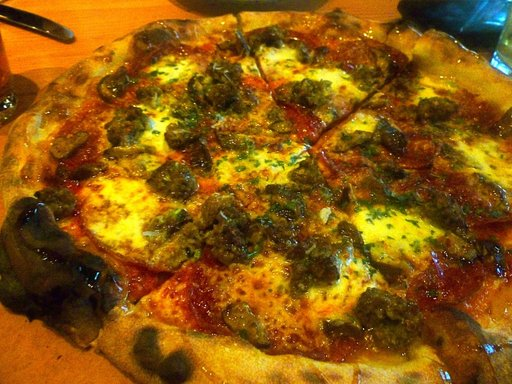

In [40]:
img_as_array

In [42]:
# Converting Array to Tensors and then torch.utils.data.datset
# then torch.dataloader
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [44]:
data_transform= transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [46]:
data_transform(image).shape

torch.Size([3, 64, 64])

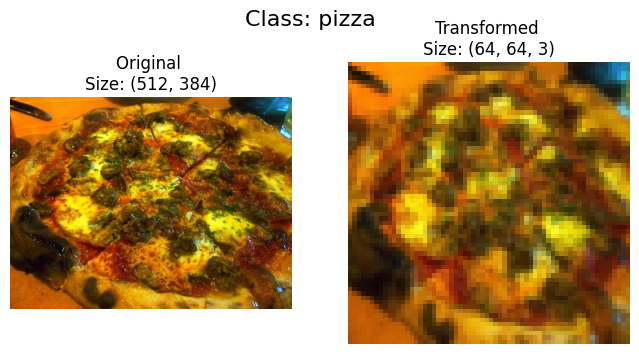

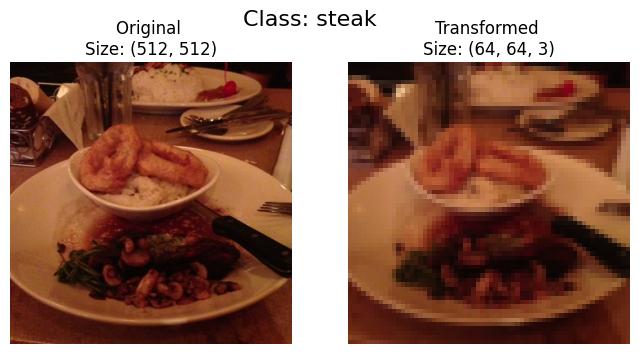

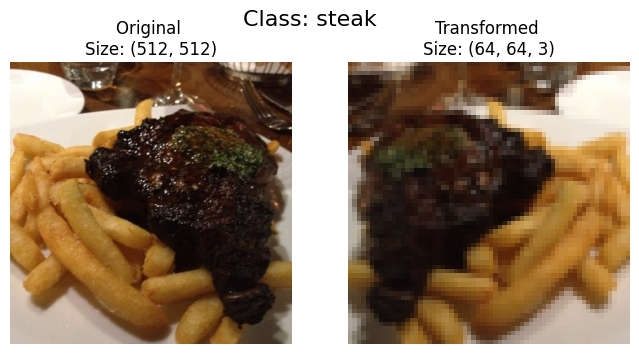

In [55]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch

def random_seed(seed: int):
    random.seed(seed)
    torch.manual_seed(seed)

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    if seed:
        random_seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

            # Original image
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transformed image
            transformed_image = transform(f)

            # If the transform returns a tensor, convert to numpy and permute
            if isinstance(transformed_image, torch.Tensor):
                transformed_image = transformed_image.permute(1, 2, 0)  # C,H,W -> H,W,C
                transformed_image = transformed_image.numpy()

            ax[1].imshow(transformed_image)
            if isinstance(transformed_image, torch.Tensor):
                size_info = tuple(transformed_image.shape)
            else:
                size_info = transformed_image.shape if hasattr(transformed_image, "shape") else f.size

            ax[1].set_title(f"Transformed \nSize: {size_info}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            plt.show()


# Example call
plot_transformed_images(
    image_paths=image_path_list,
    transform=data_transform,
    n=3,
    seed=42
)


In [57]:
# Use image folder to createa datsets
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)

test_data=datasets.ImageFolder(root=test_dir,transform=data_transform,target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [64]:
train_dir,test_dir
# Get class name as a list
class_names=train_data.classes
class_names
# GET IT AS DICT
class_dict=train_data.class_to_idx
class_dict

len(train_data),len(test_data)

(225, 75)

In [69]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [71]:
import os
os.cpu_count()

2

In [80]:
#Creating a training and testing dataloader (it lets the dataset into iterables and we can keep it in batch size)
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE, num_workers=1,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE, num_workers=1,shuffle=False)
train_dataloader,test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7c64ab021c10>,
 <torch.utils.data.dataloader.DataLoader at 0x7c64ab023810>)

In [81]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [82]:
image_batch,label_batch=next(iter(train_dataloader))
image_batch.shape,label_batch.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))